In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ЛР2

In [ ]:
!wget https://raw.githubusercontent.com/AI-is-out-there/data2lab/refs/heads/main/модуль%203%20-%20датасет%20-%20практика.csv

--2025-04-15 15:38:14--  https://raw.githubusercontent.com/AI-is-out-there/data2lab/refs/heads/main/%D0%BC%D0%BE%D0%B4%D1%83%D0%BB%D1%8C%203%20-%20%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20-%20%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2317929 (2.2M) [text/plain]
Saving to: ‘модуль 3 - датасет - практика.csv’

модуль 3 - датасет  100%[===================>]   2.21M  --.-KB/s    in 0.08s   

2025-04-15 15:38:15 (28.5 MB/s) - ‘модуль 3 - датасет - практика.csv’ saved [2317929/2317929]



In [ ]:
# загружаем полный датасет
raw_table_data = pd.read_csv('модуль 3 - датасет - практика.csv')
raw_table_data.head(10)

,subject_id,Count_subj,study_id,cart_id,Healthy_Status,eeg_time,eeg_date,report_0,report_1,report_2,...,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
0,19557662,27,40000017,6848296,0,8:44 AM,27.06.2015,Sinus rhythm,Possible right atrial abnormality,NaN,...,60 Hz notch Baseline filter,659,40,128,170,258,518,81,77,79
1,18477137,93,40000029,6848296,0,9:54 AM,27.06.2015,Sinus rhythm,Possible right atrial abnormality,NaN,...,60 Hz notch Baseline filter,722,40,124,162,246,504,77,75,70
2,16598616,3,40000035,6376932,1,9:07 AM,28.06.2015,Sinus tachycardia,NaN,Normal ECG except for rate,...,60 Hz notch Baseline filter,600,40,130,162,244,474,79,72,77
3,16368287,7,40000079,6214760,1,5:14 PM,15.07.2015,Sinus rhythm,NaN,Normal ECG,...,60 Hz notch Baseline filter,659,40,146,180,254,538,79,66,69
4,18370366,2,40000084,6632385,0,1:52 PM,27.09.2015,Sinus rhythm,NaN,NaN,...,<not specified>,659,368,29999,504,590,868,84,80,77
5,15606157,55,40000089,6632385,0,2:29 PM,29.10.2013,Sinus rhythm,NaN,NaN,...,<not specified>,822,365,29999,499,592,852,26,46,30
6,12576058,43,40000115,6852956,1,12:54 PM,23.03.2016,Sinus rhythm,NaN,Normal ECG,...,60 Hz notch Baseline filter,952,40,146,198,282,598,24,80,20
7,14691089,1,40000143,6551957,0,10:01 AM,10.12.2016,Sinus rhythm,rSr'(V1) - probable normal variant,Low QRS voltages in precordial leads,...,60 Hz notch Baseline filter,923,40,140,188,278,594,26,86,13
8,14144725,7,40000144,6924910,0,7:24 AM,11.12.2011,Sinus rhythm with PAC(s).,NaN,Borderline ECG,...,60 Hz notch Baseline filter,952,40,180,196,294,610,59,-17,3
9,16089780,2,40000152,6919786,0,12:35 PM,13.12.2011,Sinus rhythm,Extensive T wave changes may be due to myocard...,NaN,...,60 Hz notch Baseline filter,1000,40,156,178,274,584,8,-11,19


Удаляем лишние столбцы

In [ ]:
table_data = raw_table_data[['Count_subj', 'rr_interval', 'p_end',  'qrs_onset', 'qrs_end', 'p_axis', 'qrs_axis', 't_axis', 'Healthy_Status']].copy()
table_data.head(10)

,Count_subj,rr_interval,p_end,qrs_onset,qrs_end,p_axis,qrs_axis,t_axis,Healthy_Status
0,27,659,128,170,258,81,77,79,0
1,93,722,124,162,246,77,75,70,0
2,3,600,130,162,244,79,72,77,1
3,7,659,146,180,254,79,66,69,1
4,2,659,29999,504,590,84,80,77,0
5,55,822,29999,499,592,26,46,30,0
6,43,952,146,198,282,24,80,20,1
7,1,923,140,188,278,26,86,13,0
8,7,952,180,196,294,59,-17,3,0
9,2,1000,156,178,274,8,-11,19,0


## Предобработка датасета

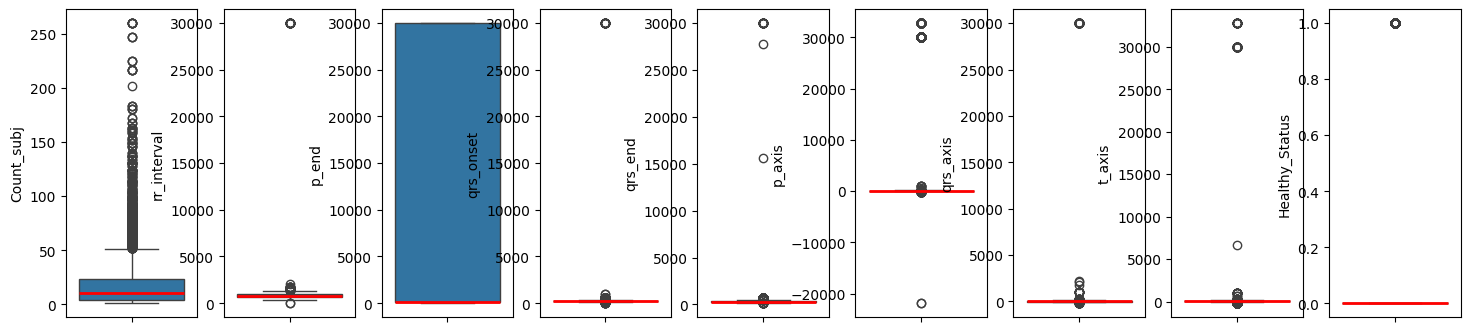

In [ ]:
n = table_data.shape[1]
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = table_data.columns[i]
    sns.boxplot(y = table_data.iloc[:,i],data=table_data, medianprops={"color": "r", "linewidth": 2})

Много выбросов

In [ ]:
#убираем выбросы
columns_to_filter = ['rr_interval', 'qrs_onset','qrs_end', 'p_axis', 'qrs_axis', 't_axis', 'p_end']
table_data_filtered = table_data[(table_data[columns_to_filter] < 2000).all(axis=1)]
table_data_filtered = table_data_filtered[(table_data_filtered['qrs_onset'] < table_data_filtered['qrs_end'])]

In [ ]:
print(len(table_data))
print(len(table_data_filtered))

10000
7046


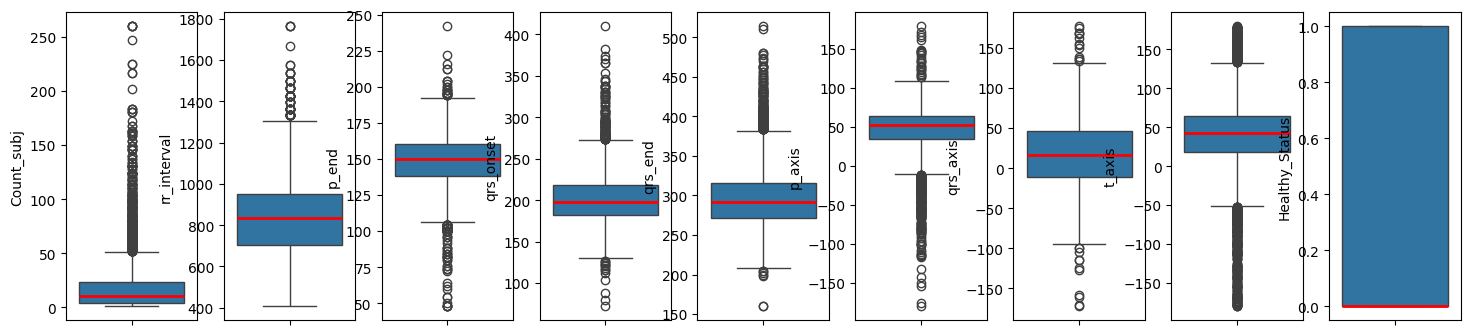

In [ ]:
n = table_data_filtered.shape[1]
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = table_data_filtered.columns[i]
    sns.boxplot(y = table_data_filtered.iloc[:,i],data=table_data_filtered, medianprops={"color": "r", "linewidth": 2})

Разброс данных уменьшился. Теперь сравним классы

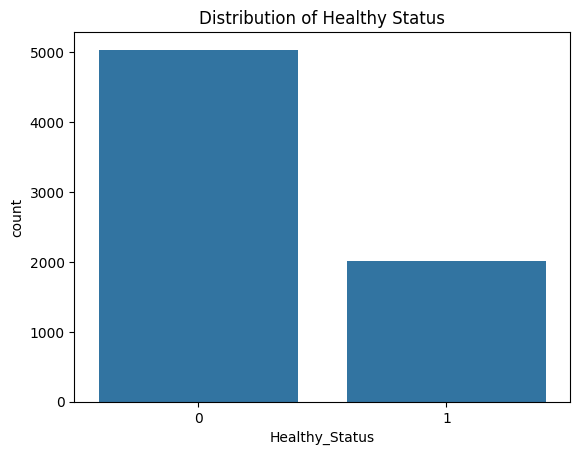

In [ ]:
sns.countplot(data=table_data_filtered, x="Healthy_Status")
plt.title("Distribution of Healthy Status")
plt.show()

Явный дисбаланс. Используем SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Разделяем данные на признаки и целевой вектор
X = table_data_filtered.drop('Healthy_Status', axis=1)
y = table_data_filtered['Healthy_Status']

# Вывод распределения классов до SMOTE
print("Распределение классов до SMOTE:")
print(y.value_counts())

# Создаем экземпляр SMOTE
smote = SMOTE(random_state=42)

# Применяем SMOTE к данным
X_res, y_res = smote.fit_resample(X, y)

# Объединяем обработанные данные в один DataFrame для удобного отображения
table_data_filtered = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.Series(y_res, name='Healthy_Status')], axis=1)

Распределение классов до SMOTE:
Healthy_Status
0    5039
1    2007
Name: count, dtype: int64


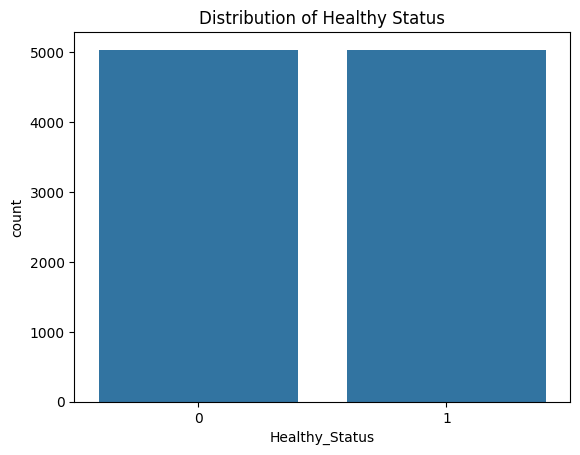

In [ ]:
sns.countplot(data=table_data_filtered, x="Healthy_Status")
plt.title("Distribution of Healthy Status")
plt.show()

# ЛР3

## FEDOT

In [ ]:
!pip install -U fedot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.2/416.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.2/296.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.0/394.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### До предобработки

Level 45:root:ApiComposer - Initial pipeline was fitted in 5.1 sec.


2025-04-14 21:19:00,791 - ApiComposer - Initial pipeline was fitted in 5.1 sec.


Level 45:root:ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 25.4 sec.


2025-04-14 21:19:00,799 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 25.4 sec.


Level 45:root:ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling', 'xgboost'].


2025-04-14 21:19:00,815 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling', 'xgboost'].


Level 45:root:ApiComposer - Timeout is too small for composing and is skipped because fit_time is 25.366725 sec.


2025-04-14 21:19:01,064 - ApiComposer - Timeout is too small for composing and is skipped because fit_time is 25.366725 sec.


Level 45:root:ApiComposer - Hyperparameters tuning started with 5 min. timeout


2025-04-14 21:19:01,245 - ApiComposer - Hyperparameters tuning started with 5 min. timeout


Level 45:root:SimultaneousTuner - Initial graph: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 

2025-04-14 21:19:27,581 - SimultaneousTuner - Initial graph: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30

Level 45:root:SimultaneousTuner - Final graph: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 2,

2025-04-14 21:24:00,528 - SimultaneousTuner - Final graph: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 

Level 45:root:SimultaneousTuner - Final metric: 0.908


2025-04-14 21:24:00,540 - SimultaneousTuner - Final metric: 0.908


Level 45:root:ApiComposer - Hyperparameters tuning finished


2025-04-14 21:24:00,554 - ApiComposer - Hyperparameters tuning finished


Level 45:root:ApiComposer - Model generation finished


2025-04-14 21:24:01,001 - ApiComposer - Model generation finished


Level 45:root:FEDOT logger - Final pipeline was fitted


2025-04-14 21:24:06,554 - FEDOT logger - Final pipeline was fitted


Level 45:root:FEDOT logger - Final pipeline: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 2, '

2025-04-14 21:24:06,563 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n

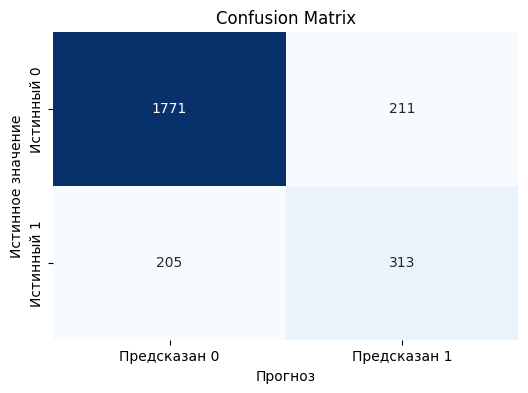

Отчет классификации:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1982
           1       0.60      0.60      0.60       518

    accuracy                           0.83      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.83      0.83      0.83      2500



In [ ]:
# Импорт необходимых библиотек
import pandas as pd
from fedot.api.main import Fedot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Разделяем данные на признаки (features) и целевую переменную (target)
features = table_data.drop(columns=['Healthy_Status'])
target = table_data['Healthy_Status']

# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Создаем объект FEDOT для задачи классификации
automl_model = Fedot(problem='classification', timeout=5, preset='best_quality', n_jobs=-1)

# Обучаем модель на обучающей выборке
automl_model.fit(features=X_train, target=y_train)

# Предсказание классов для тестовой выборки
predictions = automl_model.predict(features=X_test)

# Вычисляем точность модели
accuracy = accuracy_score(y_test, predictions)
print("Точность модели:", accuracy)

# Подсчет и вывод confusion matrix
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Предсказан 0', 'Предсказан 1'],
            yticklabels=['Истинный 0', 'Истинный 1'])
plt.xlabel('Прогноз')
plt.ylabel('Истинное значение')
plt.title('Confusion Matrix')
plt.show()

# Вместо f1-score выводим полный отчёт классификации sklearn
report = classification_report(y_test, predictions)
print("Отчет классификации:")
print(report)

### После предобработки

Level 100:root:Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'


2025-04-15 16:10:51,775 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'


Level 45:root:ApiComposer - Initial pipeline was fitted in 6.5 sec.


2025-04-15 16:11:03,098 - ApiComposer - Initial pipeline was fitted in 6.5 sec.


Level 45:root:ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 32.5 sec.


2025-04-15 16:11:03,104 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 32.5 sec.


Level 45:root:ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling', 'xgboost'].


2025-04-15 16:11:03,123 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling', 'xgboost'].


Level 45:root:ApiComposer - Timeout is too small for composing and is skipped because fit_time is 32.5007 sec.


2025-04-15 16:11:03,372 - ApiComposer - Timeout is too small for composing and is skipped because fit_time is 32.5007 sec.


Level 45:root:ApiComposer - Hyperparameters tuning started with 5 min. timeout


2025-04-15 16:11:03,554 - ApiComposer - Hyperparameters tuning started with 5 min. timeout


Level 45:root:SimultaneousTuner - Initial graph: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 

2025-04-15 16:11:39,188 - SimultaneousTuner - Initial graph: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30

Level 45:root:SimultaneousTuner - Final graph: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 2,

2025-04-15 16:15:59,948 - SimultaneousTuner - Final graph: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 

Level 45:root:SimultaneousTuner - Final metric: 0.907


2025-04-15 16:15:59,954 - SimultaneousTuner - Final metric: 0.907


Level 45:root:ApiComposer - Hyperparameters tuning finished


2025-04-15 16:15:59,965 - ApiComposer - Hyperparameters tuning finished


Level 45:root:ApiComposer - Model generation finished


2025-04-15 16:16:00,424 - ApiComposer - Model generation finished


Level 45:root:FEDOT logger - Final pipeline was fitted


2025-04-15 16:16:07,787 - FEDOT logger - Final pipeline was fitted


Level 45:root:FEDOT logger - Final pipeline: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 2, '

2025-04-15 16:16:07,794 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n

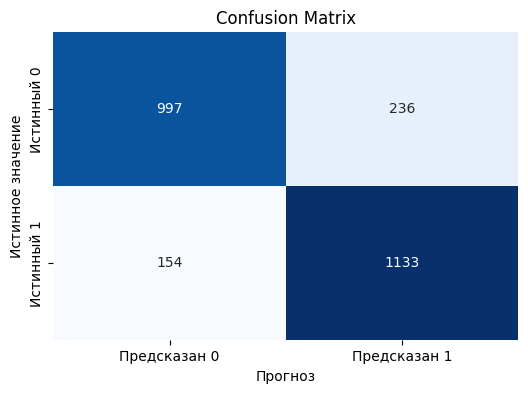

Отчет классификации:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1233
           1       0.83      0.88      0.85      1287

    accuracy                           0.85      2520
   macro avg       0.85      0.84      0.84      2520
weighted avg       0.85      0.85      0.84      2520



In [ ]:
# Импорт необходимых библиотек
import pandas as pd
from fedot.api.main import Fedot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Разделяем данные на признаки (features) и целевую переменную (target)
features = table_data_filtered.drop(columns=['Healthy_Status'])
target = table_data_filtered['Healthy_Status']

# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Создаем объект FEDOT для задачи классификации
automl_model = Fedot(problem='classification', timeout=5, preset='best_quality', n_jobs=-1)

# Обучаем модель на обучающей выборке
automl_model.fit(features=X_train, target=y_train)

# Предсказание классов для тестовой выборки
predictions = automl_model.predict(features=X_test)

# Вычисляем точность модели
accuracy = accuracy_score(y_test, predictions)
print("Точность модели:", accuracy)

# Подсчет и вывод confusion matrix
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Предсказан 0', 'Предсказан 1'],
            yticklabels=['Истинный 0', 'Истинный 1'])
plt.xlabel('Прогноз')
plt.ylabel('Истинное значение')
plt.title('Confusion Matrix')
plt.show()

# Вместо f1-score выводим полный отчёт классификации sklearn
report = classification_report(y_test, predictions)
print("Отчет классификации:")
print(report)

## LAMA

In [ ]:
!pip install -U lightautoml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.0/399.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.0/216.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00


### До предобработки

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: binary

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 60.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (7500, 9)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 59.43 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [0], 'embed_sizes': array([11], dtype=int32), 'data_size': 16}
INFO2:lightautoml.ml_alg

Точность модели: 0.8344

Confusion Matrix:
[[1782  200]
 [ 214  304]]


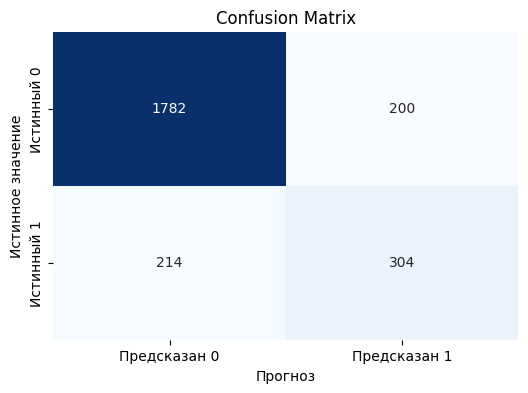

Отчет классификации:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1982
           1       0.60      0.59      0.59       518

    accuracy                           0.83      2500
   macro avg       0.75      0.74      0.75      2500
weighted avg       0.83      0.83      0.83      2500



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

# Разбиваем данные на обучающую и тестовую выборки
train_df, test_df = train_test_split(table_data, test_size=0.25, random_state=42)


# Инициализируем модель LightAutoML для задачи бинарной классификации
automl = TabularAutoML(task=Task('binary'), timeout=60)

# Обучаем модель на тренировочных данных
oof_pred = automl.fit_predict(train_df, roles={'target': 'Healthy_Status'})

# Получаем предсказания для тестового набора
pred_test = automl.predict(test_df)

# Извлекаем прогнозы – для бинарной классификации LightAutoML возвращает вероятности.
if len(pred_test.data.shape) == 2 and pred_test.data.shape[1] > 1:
    y_proba = pred_test.data[:, 1]
else:
    y_proba = pred_test.data

# Преобразуем вероятностные оценки в классы, используя порог 0.5
predictions = (y_proba >= 0.5).astype(int)

# Истинные значения целевой переменной
y_test = test_df['Healthy_Status'].values

# Расчет точности модели
accuracy = accuracy_score(y_test, predictions)
print("Точность модели:", accuracy)

# Подсчет матрицы ошибок (confusion matrix)
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

# Визуализируем матрицу ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Предсказан 0', 'Предсказан 1'],
            yticklabels=['Истинный 0', 'Истинный 1'])
plt.xlabel('Прогноз')
plt.ylabel('Истинное значение')
plt.title('Confusion Matrix')
plt.show()

# Выводим подробный отчёт классификации (precision, recall, f1-score, support)
report = classification_report(y_test, predictions)
print("Отчет классификации:")
print(report)


### После предобработки

/usr/local/lib/python3.11/dist-packages/lightautoml/transformers/text.py:22: UserWarning: 'gensim' - package isn't installed
  warnings.warn("'gensim' - package isn't installed")
INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: binary

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 60.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (7558, 9)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 49.86 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 1

Точность модели: 0.8535714285714285

Confusion Matrix:
[[1009  224]
 [ 145 1142]]


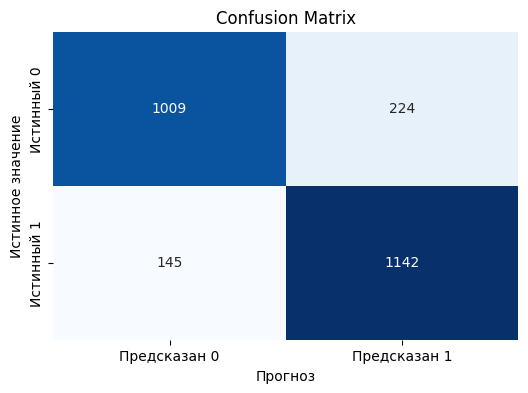

Отчет классификации:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1233
           1       0.84      0.89      0.86      1287

    accuracy                           0.85      2520
   macro avg       0.86      0.85      0.85      2520
weighted avg       0.85      0.85      0.85      2520



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

# Разбиваем данные на обучающую и тестовую выборки
train_df, test_df = train_test_split(table_data_filtered, test_size=0.25, random_state=42)


# Инициализируем модель LightAutoML для задачи бинарной классификации
automl = TabularAutoML(task=Task('binary'), timeout=60)

# Обучаем модель на тренировочных данных
oof_pred = automl.fit_predict(train_df, roles={'target': 'Healthy_Status'})

# Получаем предсказания для тестового набора
pred_test = automl.predict(test_df)

# Извлекаем прогнозы – для бинарной классификации LightAutoML возвращает вероятности.
if len(pred_test.data.shape) == 2 and pred_test.data.shape[1] > 1:
    y_proba = pred_test.data[:, 1]
else:
    y_proba = pred_test.data

# Преобразуем вероятностные оценки в классы, используя порог 0.5
predictions = (y_proba >= 0.5).astype(int)

# Истинные значения целевой переменной
y_test = test_df['Healthy_Status'].values

# Расчет точности модели
accuracy = accuracy_score(y_test, predictions)
print("Точность модели:", accuracy)

# Подсчет матрицы ошибок (confusion matrix)
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

# Визуализируем матрицу ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Предсказан 0', 'Предсказан 1'],
            yticklabels=['Истинный 0', 'Истинный 1'])
plt.xlabel('Прогноз')
plt.ylabel('Истинное значение')
plt.title('Confusion Matrix')
plt.show()

# Выводим подробный отчёт классификации (precision, recall, f1-score, support)
report = classification_report(y_test, predictions)
print("Отчет классификации:")
print(report)


In [ ]:
### После пр

## H2O

In [ ]:
!pip install -U h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 5.2 MB/s eta 0:00:00


### До предобработки

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,16 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_kbjhkk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_3_AutoML_1_20250414_214312     0.911205   0.271471  0.602434                0.135967  0.306283  0.093809
StackedEnsemble_AllModels_2_AutoML_1_20250414_214312     0.911045   0.272291  0.605375                0.13689   0.306565  0.0939823
StackedEnsemble_BestOfFamily_3_AutoML_1_20250414_214312  0.910985   0.272563  0.601059                0.146275  0.306643  0.0940297
StackedEnsemble_BestOfFamily_4_AutoML_1_20250414_214312  0.910925   0.275183  0.59949                 0.135631  0.30731   0.0944397
StackedEnsemble_AllModels_1_AutoML_1_20250414_214312     0.910587   0.27517   0.604842                0.133715  0.307603  0.0946194
GBM_grid_1_AutoML_1

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Точность модели: 0.8526104417670682

Confusion Matrix:
[[1660  320]
 [  47  463]]


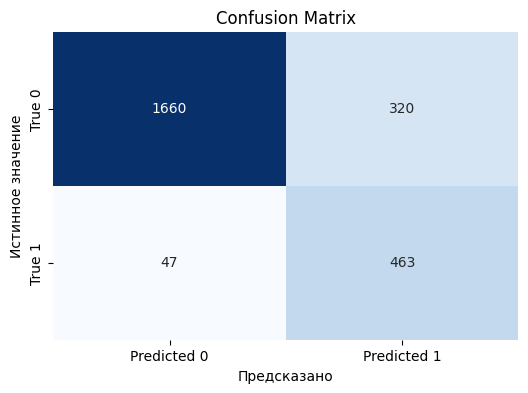

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1980
           1       0.59      0.91      0.72       510

    accuracy                           0.85      2490
   macro avg       0.78      0.87      0.81      2490
weighted avg       0.89      0.85      0.86      2490



In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Инициализация h2o (если h2o уже запущен, эта команда просто подключится к серверу)
h2o.init()

# Преобразуем его в H2OFrame.
h2o_data = h2o.H2OFrame(table_data)
# Приводим целевую переменную к категориальному типу, так как это бинарная классификация.
h2o_data['Healthy_Status'] = h2o_data['Healthy_Status'].asfactor()

# Разбиваем данные на обучающую и тестовую выборки
train, test = h2o_data.split_frame(ratios=[0.75], seed=42)

# Определяем признаки и целевую переменную.
features = [col for col in table_data.columns if col != 'Healthy_Status']
target = 'Healthy_Status'

# Инициализируем H2OAutoML.
aml = H2OAutoML(max_runtime_secs=300, seed=42)
aml.train(x=features, y=target, training_frame=train)

# Выводим leaderboard, чтобы увидеть результаты всех моделей.
lb = aml.leaderboard
print(lb)

# Получаем предсказания лучшей модели
pred = aml.leader.predict(test)
pred_df = pred.as_data_frame()

# Для бинарной классификации:
y_pred = pred_df['predict'].astype(int)
y_proba = pred_df['p1'].astype(float)

# Получаем истинные метки из тестового набора.
y_true = test['Healthy_Status'].as_data_frame().values.flatten().astype(int)

# Вывод точности
accuracy = (y_pred == y_true).mean()
print("Точность модели:", accuracy)

# Строим confusion matrix с помощью sklearn.
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Визуализация матрицы ошибок.
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Предсказано')
plt.ylabel('Истинное значение')
plt.title('Confusion Matrix')
plt.show()

# Выводим подробный отчёт классификации (precision, recall, f1-score и support).
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)


### После предобработки

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphwq2jker
  JVM stdout: /tmp/tmphwq2jker/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphwq2jker/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_a9428y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_3_AutoML_1_20250415_171504     0.930003   0.321631  0.917348                0.144772  0.320198  0.102527
StackedEnsemble_BestOfFamily_4_AutoML_1_20250415_171504  0.926372   0.324637  0.908867                0.142911  0.321145  0.103134
StackedEnsemble_AllModels_2_AutoML_1_20250415_171504     0.923255   0.328732  0.903048                0.147602  0.323087  0.104385
StackedEnsemble_AllModels_1_AutoML_1_20250415_171504     0.923216   0.328998  0.902989                0.147453  0.323116  0.104404
StackedEnsemble_BestOfFamily_2_AutoML_1_20250415_171504  0.922905   0.330263  0.902713                0.147867  0.323634  0.104739
StackedEnsemble_BestOfFa

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Точность модели: 0.8516154766653371

Confusion Matrix:
[[ 988  278]
 [  94 1147]]


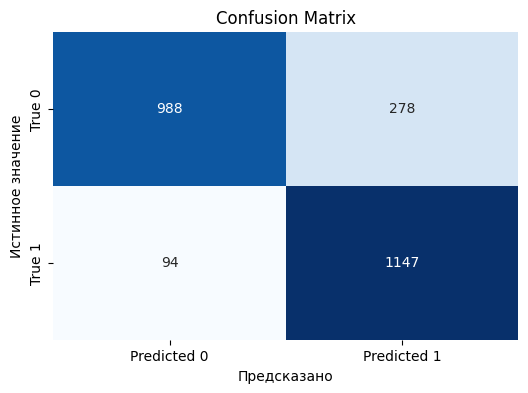

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1266
           1       0.80      0.92      0.86      1241

    accuracy                           0.85      2507
   macro avg       0.86      0.85      0.85      2507
weighted avg       0.86      0.85      0.85      2507



In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Инициализация h2o (если h2o уже запущен, эта команда просто подключится к серверу)
h2o.init()

# Преобразуем его в H2OFrame.
h2o_data = h2o.H2OFrame(table_data_filtered)
# Приводим целевую переменную к категориальному типу, так как это бинарная классификация.
h2o_data['Healthy_Status'] = h2o_data['Healthy_Status'].asfactor()

# Разбиваем данные на обучающую и тестовую выборки
train, test = h2o_data.split_frame(ratios=[0.75], seed=42)

# Определяем признаки и целевую переменную.
features = [col for col in table_data_filtered.columns if col != 'Healthy_Status']
target = 'Healthy_Status'

# Инициализируем H2OAutoML.
aml = H2OAutoML(max_runtime_secs=300, seed=42)
aml.train(x=features, y=target, training_frame=train)

# Выводим leaderboard, чтобы увидеть результаты всех моделей.
lb = aml.leaderboard
print(lb)

# Получаем предсказания лучшей модели
pred = aml.leader.predict(test)
pred_df = pred.as_data_frame()

# Для бинарной классификации:
y_pred = pred_df['predict'].astype(int)
y_proba = pred_df['p1'].astype(float)

# Получаем истинные метки из тестового набора.
y_true = test['Healthy_Status'].as_data_frame().values.flatten().astype(int)

# Вывод точности
accuracy = (y_pred == y_true).mean()
print("Точность модели:", accuracy)

# Строим confusion matrix с помощью sklearn.
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Визуализация матрицы ошибок.
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Предсказано')
plt.ylabel('Истинное значение')
plt.title('Confusion Matrix')
plt.show()

# Выводим подробный отчёт классификации (precision, recall, f1-score и support).
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)


In [ ]:
#зашрузка модели
leader_model = aml.leader  # лидер H2O модели

# Указываем путь, куда сохраняем модель.
mojo_path = h2o.download_model(model=leader_model)
print("Модель сохранена по пути:", mojo_path)

Модель сохранена по пути: /content/StackedEnsemble_AllModels_3_AutoML_1_20250415_171504
